In [1]:
from keras.datasets import mnist     # Get MNIST dataset from Keras
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers for the model
from keras.utils import np_utils  # for converting array of labeled data to one-hot vector. 

import matplotlib.pyplot as plt
import numpy as np                   # advanced math library
import random                        # for generating random numbers

In [2]:
# 60,000 for training, 10000 for test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Reshape 28*28 matrices into vectors
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)

# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')  
X_test = X_test.astype('float32')

# normalize the inputs to be in the range [0-1] instead of [0-255].
X_train /= 255                       
X_test /= 255

In [4]:
# Modify classes to be in the one-hot format.
nb_classes = 10 # number of digits
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
# model is a linear stack of layers
model = Sequential()
# The first hidden layer has 500 neurons
model.add(Dense(500, input_shape=(784,))) # 784 is the length of vector
model.add(Activation('relu'))
model.add(Dropout(0.2)) # protect the model from overfitting 
# The second hidden layer has 500 neurons, too
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# The final layer is output that has 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Summarize the built model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [6]:
# categorical cross-entropy is a loss function to comparing two probability distributions.
# use the Adam optimizer for learning
# The optimizer helps determine how quickly the model learns through gradient descent. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#Training
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.2481 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0997 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0723 - accuracy: 0.9774
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0568 - accuracy: 0.9826
Epoch 5/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0480 - accuracy: 0.9841


In [8]:
#Evaluation
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.9808
Test loss: 0.06227906420826912
Test accuracy: 0.9807999730110168


In [9]:
#prediction
prediction=model.predict([X_test])
np.argmax(prediction[10]) # argmax() returns indices of the max element of the array

313/313 [==============================] - 1s 4ms/step


0

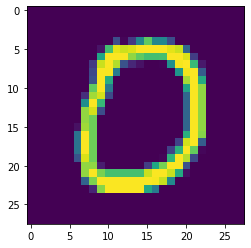

In [10]:
some_digit=X_test[10]
some_digit_image = some_digit.reshape(28, 28)
# display it using Matplotlib
plt.imshow(some_digit_image)